### 6.2.3 ReLU를 사용할 떄의 가중치 초깃값
ReLU에 특화된 초깃값 : **He 초깃값**  
<img style="float: left;" src="equations_and_figures/fig%206-14.png" width="500">

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

===========iteration:0===========
std=0.01:2.3025251391074812
Xavier:2.2968065514930194
He:2.510180954747236
===========iteration:100===========
std=0.01:2.3019917508543397
Xavier:2.2241048590405583
He:1.2626606617038842
===========iteration:200===========
std=0.01:2.3024071361400176
Xavier:2.1395600252298554
He:0.688347281980167
===========iteration:300===========
std=0.01:2.3031165297906826
Xavier:1.779447019373734
He:0.5181240489654589
===========iteration:400===========
std=0.01:2.302998585570781
Xavier:1.2549464124393324
He:0.416623355820015
===========iteration:500===========
std=0.01:2.3027981643201874
Xavier:0.9641108834456306
He:0.45978633722976336
===========iteration:600===========
std=0.01:2.29484174424186
Xavier:0.6494473698642724
He:0.27141139286829463
===========iteration:700===========
std=0.01:2.2988308117312894
Xavier:0.5612553358682133
He:0.30874496744919777
===========iteration:800===========
std=0.01:2.2988715874132475
Xavier:0.46256798702992274
He:0.23718664192889

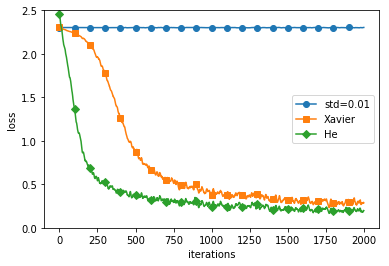

In [2]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


## 6.3 배치 정규화  
각 층이 활성화를 적당히 퍼뜨리도록 강제 : **배치 정규화** Batch Normalization  
### 6.3.1 배치 정규화 알고리즘  
- 학습 속도 개선
- 초깃값에 크게 의존하지 않음
- 오버피팅 억제
- 각 층의 활성화값이 적당히 분포되게 조정  
<img style="float: left;" src="equations_and_figures/fig%206-16.png" width="500">  

데이터 분포가 평균이 0, 분산이 1이 되도록 정규화  
<img style="float: left;" src="equations_and_figures/e%206.7.png" width="200">  
<img style="float: left;" src="equations_and_figures/fig%206-17.png" width="500">  

### 6.3.2 배치 정규화의 효과

============== 1/16 ==============
epoch:0 | 0.116 - 0.137


C:\Users\kdlsh\Desktop\deep-learning-from-scratch-master\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
C:\Users\kdlsh\Desktop\deep-learning-from-scratch-master\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\kdlsh\Desktop\deep-learning-from-scratch-master\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
c:\python36\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.097 - 0.134
epoch:2 | 0.097 - 0.121
epoch:3 | 0.097 - 0.137
epoch:4 | 0.097 - 0.156
epoch:5 | 0.097 - 0.181
epoch:6 | 0.097 - 0.198
epoch:7 | 0.097 - 0.232
epoch:8 | 0.097 - 0.251
epoch:9 | 0.097 - 0.272
epoch:10 | 0.097 - 0.285
epoch:11 | 0.097 - 0.304
epoch:12 | 0.097 - 0.316
epoch:13 | 0.097 - 0.334
epoch:14 | 0.097 - 0.353
epoch:15 | 0.097 - 0.365
epoch:16 | 0.097 - 0.369
epoch:17 | 0.097 - 0.392


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.405
epoch:19 | 0.097 - 0.41
============== 2/16 ==============

c:\python36\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



epoch:0 | 0.117 - 0.135
epoch:1 | 0.097 - 0.142
epoch:2 | 0.097 - 0.147
epoch:3 | 0.097 - 0.162
epoch:4 | 0.097 - 0.186
epoch:5 | 0.097 - 0.203
epoch:6 | 0.097 - 0.218
epoch:7 | 0.097 - 0.236
epoch:8 | 0.097 - 0.265
epoch:9 | 0.097 - 0.294
epoch:10 | 0.097 - 0.312
epoch:11 | 0.097 - 0.326
epoch:12 | 0.097 - 0.35
epoch:13 | 0.097 - 0.369
epoch:14 | 0.097 - 0.385
epoch:15 | 0.097 - 0.41
epoch:16 | 0.097 - 0.411
epoch:17 | 0.097 - 0.437
epoch:18 | 0.097 - 0.446
epoch:19 | 0.097 - 0.484


No handles with labels found to put in legend.


============== 3/16 ==============
epoch:0 | 0.128 - 0.062
epoch:1 | 0.365 - 0.079
epoch:2 | 0.509 - 0.105
epoch:3 | 0.613 - 0.144
epoch:4 | 0.707 - 0.186
epoch:5 | 0.761 - 0.226
epoch:6 | 0.814 - 0.253
epoch:7 | 0.85 - 0.295
epoch:8 | 0.877 - 0.342
epoch:9 | 0.901 - 0.38
epoch:10 | 0.935 - 0.407
epoch:11 | 0.948 - 0.444
epoch:12 | 0.958 - 0.477
epoch:13 | 0.962 - 0.509
epoch:14 | 0.968 - 0.531
epoch:15 | 0.974 - 0.56
epoch:16 | 0.977 - 0.583
epoch:17 | 0.984 - 0.598
epoch:18 | 0.985 - 0.618
epoch:19 | 0.989 - 0.641

No handles with labels found to put in legend.



============== 4/16 ==============
epoch:0 | 0.09 - 0.106
epoch:1 | 0.247 - 0.142
epoch:2 | 0.399 - 0.233
epoch:3 | 0.492 - 0.308
epoch:4 | 0.566 - 0.364
epoch:5 | 0.605 - 0.431
epoch:6 | 0.649 - 0.483
epoch:7 | 0.688 - 0.542
epoch:8 | 0.725 - 0.562
epoch:9 | 0.747 - 0.593
epoch:10 | 0.756 - 0.634
epoch:11 | 0.775 - 0.652
epoch:12 | 0.781 - 0.685
epoch:13 | 0.802 - 0.713
epoch:14 | 0.821 - 0.731
epoch:15 | 0.824 - 0.744
epoch:16 | 0.835 - 0.754
epoch:17 | 0.855 - 0.767
epoch:18 | 0.868 - 0.777


No handles with labels found to put in legend.


epoch:19 | 0.86 - 0.792
============== 5/16 ==============
epoch:0 | 0.133 - 0.092
epoch:1 | 0.134 - 0.083
epoch:2 | 0.146 - 0.191
epoch:3 | 0.158 - 0.331
epoch:4 | 0.168 - 0.431
epoch:5 | 0.171 - 0.524
epoch:6 | 0.183 - 0.588
epoch:7 | 0.199 - 0.643
epoch:8 | 0.207 - 0.674
epoch:9 | 0.214 - 0.715
epoch:10 | 0.217 - 0.744
epoch:11 | 0.228 - 0.767
epoch:12 | 0.229 - 0.799
epoch:13 | 0.229 - 0.809
epoch:14 | 0.242 - 0.821
epoch:15 | 0.257 - 0.834
epoch:16 | 0.247 - 0.842
epoch:17 | 0.246 - 0.855
epoch:18 | 0.26 - 0.869


No handles with labels found to put in legend.


epoch:19 | 0.263 - 0.88
============== 6/16 ==============
epoch:0 | 0.106 - 0.066
epoch:1 | 0.115 - 0.203
epoch:2 | 0.107 - 0.469
epoch:3 | 0.086 - 0.607
epoch:4 | 0.121 - 0.685
epoch:5 | 0.118 - 0.738
epoch:6 | 0.119 - 0.768
epoch:7 | 0.126 - 0.801
epoch:8 | 0.116 - 0.835
epoch:9 | 0.116 - 0.847
epoch:10 | 0.117 - 0.865
epoch:11 | 0.116 - 0.881
epoch:12 | 0.116 - 0.898
epoch:13 | 0.116 - 0.902
epoch:14 | 0.116 - 0.914
epoch:15 | 0.116 - 0.925
epoch:16 | 0.116 - 0.925
epoch:17 | 0.116 - 0.942
epoch:18 | 0.116 - 0.946
epoch:19 | 0.116 - 0.947

No handles with labels found to put in legend.



============== 7/16 ==============
epoch:0 | 0.094 - 0.106
epoch:1 | 0.116 - 0.206
epoch:2 | 0.116 - 0.56
epoch:3 | 0.116 - 0.715
epoch:4 | 0.116 - 0.768
epoch:5 | 0.116 - 0.803
epoch:6 | 0.116 - 0.839
epoch:7 | 0.116 - 0.86
epoch:8 | 0.116 - 0.89
epoch:9 | 0.116 - 0.904
epoch:10 | 0.116 - 0.925
epoch:11 | 0.116 - 0.94
epoch:12 | 0.116 - 0.952
epoch:13 | 0.116 - 0.961
epoch:14 | 0.116 - 0.971
epoch:15 | 0.116 - 0.978
epoch:16 | 0.116 - 0.979
epoch:17 | 0.116 - 0.984
epoch:18 | 0.116 - 0.987
epoch:19 | 0.116 - 0.992


No handles with labels found to put in legend.


============== 8/16 ==============
epoch:0 | 0.116 - 0.101
epoch:1 | 0.116 - 0.335
epoch:2 | 0.116 - 0.628
epoch:3 | 0.116 - 0.794
epoch:4 | 0.116 - 0.858
epoch:5 | 0.116 - 0.889
epoch:6 | 0.116 - 0.933
epoch:7 | 0.116 - 0.944
epoch:8 | 0.116 - 0.966
epoch:9 | 0.116 - 0.978
epoch:10 | 0.116 - 0.983
epoch:11 | 0.116 - 0.989
epoch:12 | 0.116 - 0.993
epoch:13 | 0.116 - 0.994
epoch:14 | 0.116 - 0.993
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.997
epoch:18 | 0.116 - 0.998
epoch:19 | 0.116 - 0.998

No handles with labels found to put in legend.



============== 9/16 ==============
epoch:0 | 0.099 - 0.11
epoch:1 | 0.116 - 0.456
epoch:2 | 0.116 - 0.672
epoch:3 | 0.116 - 0.76
epoch:4 | 0.116 - 0.843
epoch:5 | 0.117 - 0.907
epoch:6 | 0.117 - 0.945
epoch:7 | 0.117 - 0.977
epoch:8 | 0.117 - 0.98
epoch:9 | 0.117 - 0.988
epoch:10 | 0.117 - 0.991
epoch:11 | 0.117 - 0.992
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 1.0


No handles with labels found to put in legend.


============== 10/16 ==============
epoch:0 | 0.097 - 0.143
epoch:1 | 0.117 - 0.544
epoch:2 | 0.117 - 0.709
epoch:3 | 0.117 - 0.792
epoch:4 | 0.117 - 0.823
epoch:5 | 0.117 - 0.856
epoch:6 | 0.117 - 0.895
epoch:7 | 0.117 - 0.927
epoch:8 | 0.117 - 0.971
epoch:9 | 0.117 - 0.962
epoch:10 | 0.117 - 0.956
epoch:11 | 0.117 - 0.98
epoch:12 | 0.117 - 0.986
epoch:13 | 0.117 - 0.983
epoch:14 | 0.117 - 0.993
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999


No handles with labels found to put in legend.


============== 11/16 ==============
epoch:0 | 0.116 - 0.213
epoch:1 | 0.116 - 0.547
epoch:2 | 0.117 - 0.691
epoch:3 | 0.117 - 0.792
epoch:4 | 0.117 - 0.836
epoch:5 | 0.117 - 0.881
epoch:6 | 0.117 - 0.938
epoch:7 | 0.117 - 0.841
epoch:8 | 0.117 - 0.972
epoch:9 | 0.117 - 0.934
epoch:10 | 0.117 - 0.981
epoch:11 | 0.117 - 0.982
epoch:12 | 0.116 - 0.989
epoch:13 | 0.116 - 0.964
epoch:14 | 0.116 - 0.952
epoch:15 | 0.116 - 0.986
epoch:16 | 0.116 - 0.99
epoch:17 | 0.116 - 0.994
epoch:18 | 0.116 - 0.994
epoch:19 | 0.116 - 0.994


No handles with labels found to put in legend.


============== 12/16 ==============
epoch:0 | 0.105 - 0.109
epoch:1 | 0.117 - 0.628
epoch:2 | 0.117 - 0.609
epoch:3 | 0.117 - 0.658
epoch:4 | 0.117 - 0.675
epoch:5 | 0.117 - 0.668
epoch:6 | 0.117 - 0.689
epoch:7 | 0.117 - 0.777
epoch:8 | 0.117 - 0.744
epoch:9 | 0.117 - 0.8
epoch:10 | 0.117 - 0.806
epoch:11 | 0.117 - 0.8
epoch:12 | 0.117 - 0.793
epoch:13 | 0.117 - 0.869
epoch:14 | 0.117 - 0.853
epoch:15 | 0.117 - 0.881
epoch:16 | 0.117 - 0.919
epoch:17 | 0.117 - 0.902
epoch:18 | 0.117 - 0.859


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.894
============== 13/16 ==============
epoch:0 | 0.117 - 0.124
epoch:1 | 0.117 - 0.351
epoch:2 | 0.116 - 0.36
epoch:3 | 0.116 - 0.59
epoch:4 | 0.117 - 0.6
epoch:5 | 0.117 - 0.569
epoch:6 | 0.117 - 0.563
epoch:7 | 0.117 - 0.613
epoch:8 | 0.117 - 0.614
epoch:9 | 0.117 - 0.615
epoch:10 | 0.117 - 0.616
epoch:11 | 0.117 - 0.617
epoch:12 | 0.117 - 0.617
epoch:13 | 0.116 - 0.616
epoch:14 | 0.117 - 0.618
epoch:15 | 0.117 - 0.622
epoch:16 | 0.116 - 0.623
epoch:17 | 0.116 - 0.619
epoch:18 | 0.116 - 0.699
epoch:19 | 0.116 - 0.672

No handles with labels found to put in legend.



============== 14/16 ==============
epoch:0 | 0.099 - 0.099
epoch:1 | 0.117 - 0.368
epoch:2 | 0.117 - 0.48
epoch:3 | 0.117 - 0.454
epoch:4 | 0.117 - 0.502
epoch:5 | 0.117 - 0.483
epoch:6 | 0.117 - 0.502
epoch:7 | 0.117 - 0.51
epoch:8 | 0.117 - 0.517
epoch:9 | 0.117 - 0.509
epoch:10 | 0.117 - 0.492
epoch:11 | 0.117 - 0.514
epoch:12 | 0.117 - 0.517
epoch:13 | 0.117 - 0.54
epoch:14 | 0.117 - 0.527
epoch:15 | 0.117 - 0.56
epoch:16 | 0.117 - 0.526
epoch:17 | 0.117 - 0.556
epoch:18 | 0.117 - 0.549
epoch:19 | 0.117 - 0.519

No handles with labels found to put in legend.



============== 15/16 ==============
epoch:0 | 0.094 - 0.206
epoch:1 | 0.117 - 0.261
epoch:2 | 0.117 - 0.259
epoch:3 | 0.117 - 0.493
epoch:4 | 0.117 - 0.502
epoch:5 | 0.117 - 0.504
epoch:6 | 0.116 - 0.487
epoch:7 | 0.116 - 0.505
epoch:8 | 0.116 - 0.507
epoch:9 | 0.117 - 0.511
epoch:10 | 0.117 - 0.512
epoch:11 | 0.117 - 0.511
epoch:12 | 0.117 - 0.513
epoch:13 | 0.116 - 0.513
epoch:14 | 0.116 - 0.513
epoch:15 | 0.116 - 0.512
epoch:16 | 0.117 - 0.515
epoch:17 | 0.117 - 0.516
epoch:18 | 0.117 - 0.516
epoch:19 | 0.117 - 0.516

No handles with labels found to put in legend.



============== 16/16 ==============
epoch:0 | 0.117 - 0.09
epoch:1 | 0.105 - 0.302
epoch:2 | 0.116 - 0.363
epoch:3 | 0.117 - 0.407
epoch:4 | 0.116 - 0.433
epoch:5 | 0.116 - 0.413
epoch:6 | 0.116 - 0.436
epoch:7 | 0.116 - 0.469
epoch:8 | 0.116 - 0.507
epoch:9 | 0.116 - 0.514
epoch:10 | 0.116 - 0.518
epoch:11 | 0.116 - 0.517
epoch:12 | 0.116 - 0.518
epoch:13 | 0.116 - 0.511
epoch:14 | 0.116 - 0.517
epoch:15 | 0.116 - 0.515
epoch:16 | 0.116 - 0.517
epoch:17 | 0.116 - 0.504
epoch:18 | 0.116 - 0.512
epoch:19 | 0.116 - 0.517


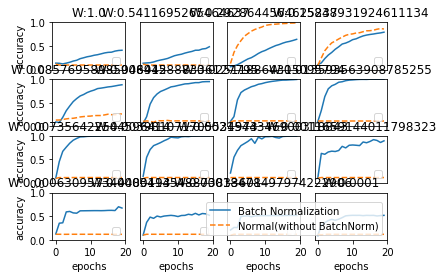

In [3]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.rcParams["figure.figsize"] = (20,15)
plt.show()


## 6.4 바른 학습을 위해
**오버피팅** : 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태  
### 6.4.1 오버피팅  
- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적음  
오버피팅 조건 : 훈련 데이터 300개만 사용하고, 7층 네트워크를 사용해 복잡성을 높임

epoch:0, train acc:0.08666666666666667, test acc:0.1013
epoch:1, train acc:0.12666666666666668, test acc:0.1159
epoch:2, train acc:0.15333333333333332, test acc:0.135
epoch:3, train acc:0.19666666666666666, test acc:0.1555
epoch:4, train acc:0.21333333333333335, test acc:0.171
epoch:5, train acc:0.2966666666666667, test acc:0.1967
epoch:6, train acc:0.33, test acc:0.2145
epoch:7, train acc:0.37666666666666665, test acc:0.2311
epoch:8, train acc:0.38333333333333336, test acc:0.2473
epoch:9, train acc:0.4033333333333333, test acc:0.2604
epoch:10, train acc:0.42, test acc:0.273
epoch:11, train acc:0.4266666666666667, test acc:0.2842
epoch:12, train acc:0.43666666666666665, test acc:0.2942
epoch:13, train acc:0.43333333333333335, test acc:0.2994
epoch:14, train acc:0.43666666666666665, test acc:0.3059
epoch:15, train acc:0.43666666666666665, test acc:0.3023
epoch:16, train acc:0.43333333333333335, test acc:0.3085
epoch:17, train acc:0.44666666666666666, test acc:0.3214
epoch:18, train acc:

epoch:160, train acc:0.8933333333333333, test acc:0.7236
epoch:161, train acc:0.8866666666666667, test acc:0.7256
epoch:162, train acc:0.8933333333333333, test acc:0.7237
epoch:163, train acc:0.8833333333333333, test acc:0.7273
epoch:164, train acc:0.8933333333333333, test acc:0.7264
epoch:165, train acc:0.89, test acc:0.7213
epoch:166, train acc:0.89, test acc:0.728
epoch:167, train acc:0.8966666666666666, test acc:0.7283
epoch:168, train acc:0.8966666666666666, test acc:0.7304
epoch:169, train acc:0.8933333333333333, test acc:0.718
epoch:170, train acc:0.8966666666666666, test acc:0.7227
epoch:171, train acc:0.8833333333333333, test acc:0.7243
epoch:172, train acc:0.88, test acc:0.7298
epoch:173, train acc:0.89, test acc:0.7284
epoch:174, train acc:0.8733333333333333, test acc:0.7225
epoch:175, train acc:0.87, test acc:0.7251
epoch:176, train acc:0.88, test acc:0.7235
epoch:177, train acc:0.8966666666666666, test acc:0.7244
epoch:178, train acc:0.8866666666666667, test acc:0.7273
epo

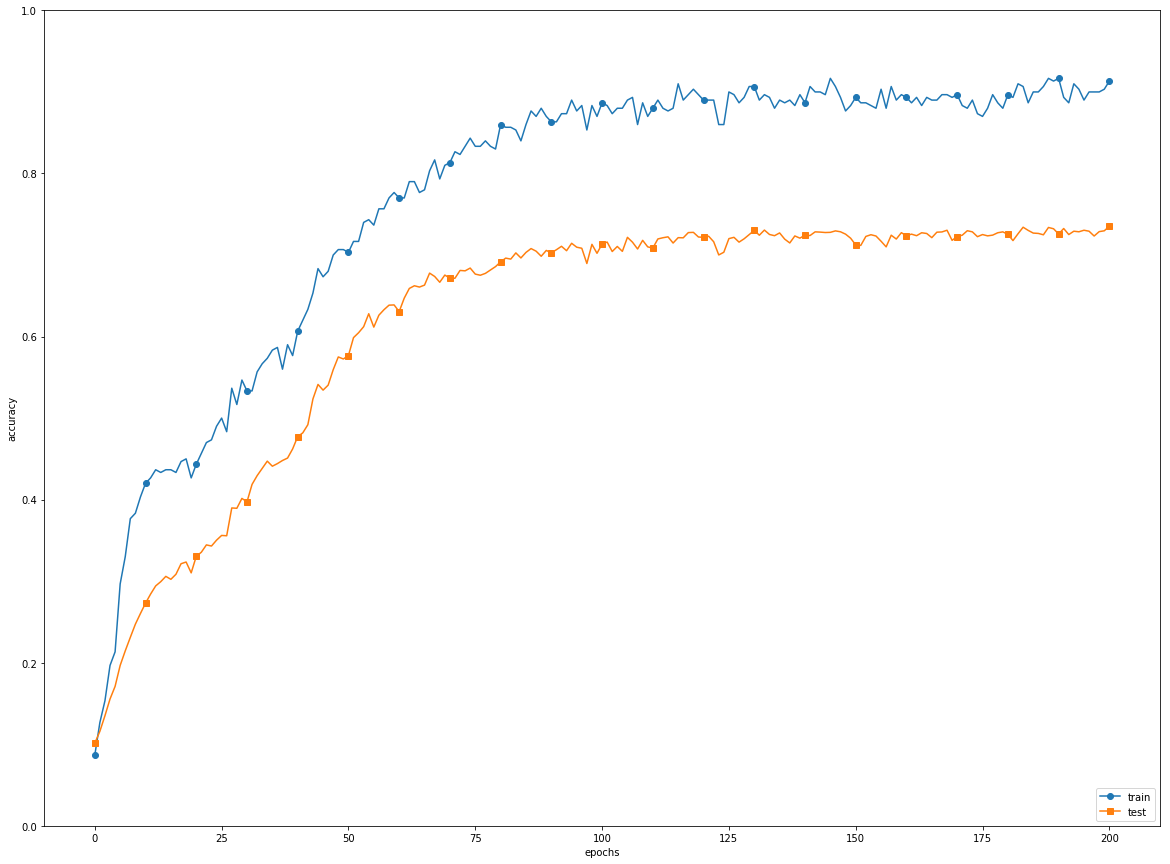

In [4]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (8,8)
plt.show()


### 6.4.2 가중치 감소  
오버피팅 억제용으로 이용해온 방법 중 **가중치 감소** weight decay : 큰 가중치에 큰 페널티 부과

epoch:0, train acc:0.15, test acc:0.1153
epoch:1, train acc:0.15333333333333332, test acc:0.1184
epoch:2, train acc:0.16333333333333333, test acc:0.1229
epoch:3, train acc:0.17333333333333334, test acc:0.1315
epoch:4, train acc:0.22333333333333333, test acc:0.1496
epoch:5, train acc:0.26, test acc:0.1729
epoch:6, train acc:0.30333333333333334, test acc:0.1938
epoch:7, train acc:0.34, test acc:0.2304
epoch:8, train acc:0.37666666666666665, test acc:0.2481
epoch:9, train acc:0.4033333333333333, test acc:0.2635
epoch:10, train acc:0.4166666666666667, test acc:0.2796
epoch:11, train acc:0.4866666666666667, test acc:0.3078
epoch:12, train acc:0.56, test acc:0.3359
epoch:13, train acc:0.55, test acc:0.3482
epoch:14, train acc:0.58, test acc:0.3751
epoch:15, train acc:0.59, test acc:0.3972
epoch:16, train acc:0.6, test acc:0.4142
epoch:17, train acc:0.6233333333333333, test acc:0.4352
epoch:18, train acc:0.6266666666666667, test acc:0.4422
epoch:19, train acc:0.65, test acc:0.459
epoch:20, tr

epoch:164, train acc:1.0, test acc:0.7531
epoch:165, train acc:1.0, test acc:0.7489
epoch:166, train acc:1.0, test acc:0.7493
epoch:167, train acc:1.0, test acc:0.749
epoch:168, train acc:1.0, test acc:0.7498
epoch:169, train acc:1.0, test acc:0.7526
epoch:170, train acc:1.0, test acc:0.7548
epoch:171, train acc:1.0, test acc:0.7508
epoch:172, train acc:1.0, test acc:0.7546
epoch:173, train acc:1.0, test acc:0.7534
epoch:174, train acc:1.0, test acc:0.7537
epoch:175, train acc:1.0, test acc:0.7533
epoch:176, train acc:1.0, test acc:0.7523
epoch:177, train acc:1.0, test acc:0.7526
epoch:178, train acc:1.0, test acc:0.7489
epoch:179, train acc:1.0, test acc:0.7523
epoch:180, train acc:1.0, test acc:0.7534
epoch:181, train acc:1.0, test acc:0.7552
epoch:182, train acc:1.0, test acc:0.7537
epoch:183, train acc:1.0, test acc:0.7548
epoch:184, train acc:1.0, test acc:0.7552
epoch:185, train acc:1.0, test acc:0.755
epoch:186, train acc:1.0, test acc:0.7548
epoch:187, train acc:1.0, test acc:0

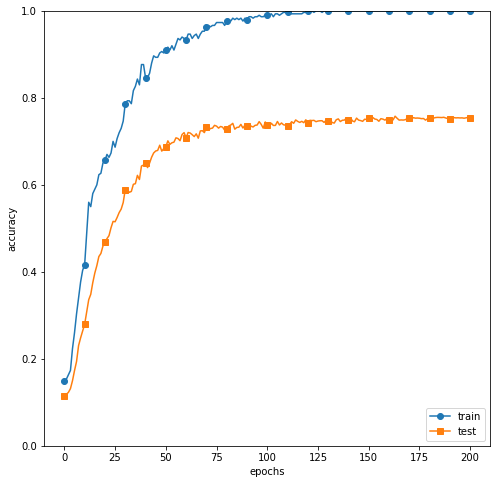

In [5]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

### 6.4.3 드롭아웃
신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려움.  
**드롭아웃** Dropout : 뉴런을 임의로 삭제하면서 학습.  
<img style="float: left;" src="equations_and_figures/fig%206-22.png" width="500">  


In [ ]:
class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

train loss:2.3056288731396806
=== epoch:1, train acc:0.11333333333333333, test acc:0.0998 ===
train loss:2.311957789483716
train loss:2.2996994333289016
train loss:2.2984380187472473
=== epoch:2, train acc:0.11666666666666667, test acc:0.1008 ===
train loss:2.315620973070188
train loss:2.311106896994634
train loss:2.3072754608881754
=== epoch:3, train acc:0.11333333333333333, test acc:0.1024 ===
train loss:2.322577584128861
train loss:2.3007664636868914
train loss:2.3255881514694683
=== epoch:4, train acc:0.11333333333333333, test acc:0.1043 ===
train loss:2.3068158634310225
train loss:2.3151187020025876
train loss:2.319750977447314
=== epoch:5, train acc:0.12, test acc:0.1051 ===
train loss:2.315197341551153
train loss:2.318867071597925
train loss:2.324885332319254
=== epoch:6, train acc:0.12333333333333334, test acc:0.1068 ===
train loss:2.306151145344674
train loss:2.300414012506452
train loss:2.312313369722931
=== epoch:7, train acc:0.13, test acc:0.1086 ===
train loss:2.3143221102

=== epoch:55, train acc:0.13666666666666666, test acc:0.1162 ===
train loss:2.27687892870732
train loss:2.277107915613901
train loss:2.2889757726191586
=== epoch:56, train acc:0.13666666666666666, test acc:0.1163 ===
train loss:2.2418994609711604
train loss:2.252999300668123
train loss:2.2663140001904427
=== epoch:57, train acc:0.13666666666666666, test acc:0.1164 ===
train loss:2.2623631096071466
train loss:2.2577666856746985
train loss:2.245038258697618
=== epoch:58, train acc:0.13666666666666666, test acc:0.1166 ===
train loss:2.262544149495672
train loss:2.273741952707648
train loss:2.253113398150088
=== epoch:59, train acc:0.13666666666666666, test acc:0.1164 ===
train loss:2.265561127934129
train loss:2.27255152460468
train loss:2.252404430444458
=== epoch:60, train acc:0.13666666666666666, test acc:0.1164 ===
train loss:2.2644668172000912
train loss:2.2612757037390927
train loss:2.2491816650198975
=== epoch:61, train acc:0.13666666666666666, test acc:0.1164 ===
train loss:2.2588

=== epoch:111, train acc:0.16666666666666666, test acc:0.1415 ===
train loss:2.1830423614628827
train loss:2.233778141379845
train loss:2.1945106107006085
=== epoch:112, train acc:0.16666666666666666, test acc:0.1426 ===
train loss:2.171441882304128
train loss:2.127647725329913
train loss:2.196946283214954
=== epoch:113, train acc:0.17, test acc:0.1428 ===
train loss:2.157324826805313
train loss:2.163680782762571
train loss:2.174516983299474
=== epoch:114, train acc:0.17333333333333334, test acc:0.1438 ===
train loss:2.2384685810820883
train loss:2.203424671469964
train loss:2.141420821402259
=== epoch:115, train acc:0.17333333333333334, test acc:0.1451 ===
train loss:2.175367985800078
train loss:2.1539887619597153
train loss:2.1627531743762898
=== epoch:116, train acc:0.17333333333333334, test acc:0.1444 ===
train loss:2.14451493865702
train loss:2.1803196936248987
train loss:2.2023138592543163
=== epoch:117, train acc:0.17333333333333334, test acc:0.1462 ===
train loss:2.106897041323

=== epoch:166, train acc:0.27666666666666667, test acc:0.2323 ===
train loss:2.0333031263431813
train loss:1.9503286033656086
train loss:2.0278523898334875
=== epoch:167, train acc:0.27, test acc:0.2328 ===
train loss:2.029648704503372
train loss:2.1647796471061094
train loss:2.0269720150265376
=== epoch:168, train acc:0.27666666666666667, test acc:0.2334 ===
train loss:1.9794509246678644
train loss:2.125270470489625
train loss:2.144588324962306
=== epoch:169, train acc:0.28, test acc:0.2358 ===
train loss:2.0942551139648926
train loss:2.052120575005327
train loss:2.1154209089934413
=== epoch:170, train acc:0.27666666666666667, test acc:0.2397 ===
train loss:2.0827796403636514
train loss:2.0254121631152064
train loss:1.9974280139830216
=== epoch:171, train acc:0.2833333333333333, test acc:0.2442 ===
train loss:2.1146417751151123
train loss:2.1313080801347475
train loss:2.0911879081129228
=== epoch:172, train acc:0.3, test acc:0.2497 ===
train loss:2.053361791112473
train loss:2.1000528

=== epoch:221, train acc:0.41, test acc:0.3289 ===
train loss:2.044025170122632
train loss:2.031915010273079
train loss:2.0275539599140453
=== epoch:222, train acc:0.4066666666666667, test acc:0.3304 ===
train loss:2.0070911691361464
train loss:1.9526860063501266
train loss:1.9647169815832146
=== epoch:223, train acc:0.41, test acc:0.3294 ===
train loss:2.001958429409498
train loss:1.8171695767335059
train loss:2.0142824260258076
=== epoch:224, train acc:0.41, test acc:0.3303 ===
train loss:2.0045389201115853
train loss:2.04770410027412
train loss:1.883045014854022
=== epoch:225, train acc:0.42, test acc:0.3375 ===
train loss:1.921122836265707
train loss:1.9800644347948344
train loss:1.848863870945485
=== epoch:226, train acc:0.42, test acc:0.3376 ===
train loss:1.9734448122017534
train loss:1.9548133140638568
train loss:2.031830601874636
=== epoch:227, train acc:0.42333333333333334, test acc:0.3395 ===
train loss:2.019912731465769
train loss:1.952086079814725
train loss:1.981237963930

=== epoch:276, train acc:0.52, test acc:0.3992 ===
train loss:1.787227771929962
train loss:1.8027836244793551
train loss:1.9093224362126633
=== epoch:277, train acc:0.5266666666666666, test acc:0.4005 ===
train loss:1.8956445349874076
train loss:1.9008991630728715
train loss:1.7302046219305784
=== epoch:278, train acc:0.51, test acc:0.3984 ===
train loss:1.8314124613513738
train loss:1.8400745883862015
train loss:1.7288367948918428
=== epoch:279, train acc:0.5233333333333333, test acc:0.408 ===
train loss:1.7495113885079308
train loss:1.8058206228434202
train loss:1.8076094019235256
=== epoch:280, train acc:0.53, test acc:0.4118 ===
train loss:1.785985800584529
train loss:1.877518712588726
train loss:1.8140383500835349
=== epoch:281, train acc:0.5366666666666666, test acc:0.4155 ===
train loss:1.7638535687864965
train loss:1.8127071279700935
train loss:1.9281440116077382
=== epoch:282, train acc:0.5466666666666666, test acc:0.4234 ===
train loss:1.785854289076937
train loss:1.750545929

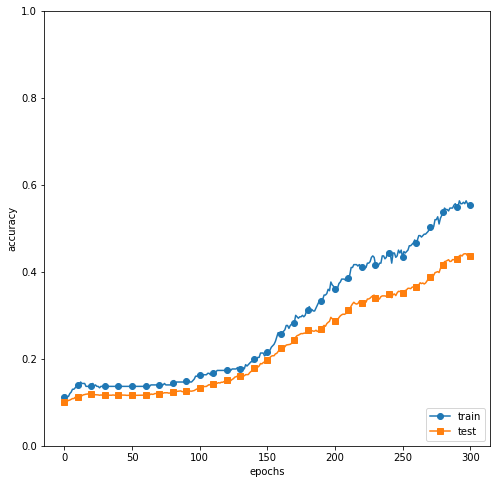

In [6]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## 6.5 적절한 하이퍼파리미터 값 찾기
### 6.5.1 검증 데이터
하이퍼파라미터 조정용 데이터 **검증 데이터** : 하이퍼파라미터의 적절성을 평가, 훈련 데이터의 20%정도를 먼저 분리  
- 훈련 데이터 (train) : 매개변수 (parameter) 학습
- 검증 데이터 (validation) : 하이퍼파라미터 성능 평가
- 시험 데이터 (test) : 신경망의 범용 성능 평가  

### 6.5.2 하이퍼파라미터 최적화  
- 0단계
 - 하이퍼파라미터 값의 범위를 설정

- 1단계
 - 설정된 범위에서 값을 무작위 추출

- 2단계
 - 1단계에서 샘플링한 값을 사용하여 학습, 검증 데이터로 정확도 평가

- 3단계
 - 1단계 2단계를 측정 횟수(100회) 반복하며, 범위를 좁혀감  

### 6.5.3 하이퍼파라미터 최적화 구현하기

val acc:0.13 | lr:2.3123376358040233e-06, weight decay:2.36352746149332e-07
val acc:0.44 | lr:0.002329420743362383, weight decay:1.625046527201949e-06
val acc:0.08 | lr:2.6710005066672237e-05, weight decay:3.122675412834945e-05
val acc:0.39 | lr:0.0027742265252046986, weight decay:6.535336645886954e-08
val acc:0.13 | lr:7.064904653887235e-06, weight decay:3.9622795456910215e-07
val acc:0.21 | lr:0.001150214920432492, weight decay:2.6139894293495954e-07
val acc:0.09 | lr:1.425613049646464e-06, weight decay:1.3281801460318024e-08
val acc:0.74 | lr:0.008353257215750613, weight decay:3.303628003310399e-07
val acc:0.11 | lr:3.1603368111551915e-06, weight decay:2.8051348253016017e-08
val acc:0.13 | lr:1.4616828293235793e-05, weight decay:2.0782431693743518e-08
val acc:0.15 | lr:7.989366270412438e-06, weight decay:9.83081287924253e-07
val acc:0.74 | lr:0.008514057843679495, weight decay:1.597454354358312e-05
val acc:0.17 | lr:1.3269413841484613e-06, weight decay:1.4731352614639905e-07
val acc

Best-12(val acc:0.6) | lr:0.005065083626491019, weight decay:1.0592697410076066e-08
Best-13(val acc:0.57) | lr:0.0044632935145285805, weight decay:7.2736975978772585e-06
Best-14(val acc:0.57) | lr:0.0038263901890310216, weight decay:2.5641124073956863e-06
Best-15(val acc:0.57) | lr:0.004838309515141693, weight decay:2.2014856775495058e-07
Best-16(val acc:0.49) | lr:0.0035331842295550165, weight decay:2.278004996206956e-07
Best-17(val acc:0.49) | lr:0.0037024318239069643, weight decay:6.507740411013794e-08
Best-18(val acc:0.48) | lr:0.0027689077449226536, weight decay:1.1561218877186471e-07
Best-19(val acc:0.44) | lr:0.002329420743362383, weight decay:1.625046527201949e-06
Best-20(val acc:0.4) | lr:0.00160420645319692, weight decay:6.0522814078814086e-05


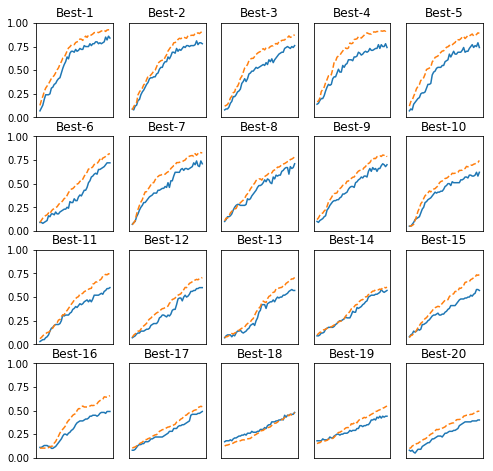

In [7]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.rcParams["figure.figsize"] = (15,15)
plt.show()
